**Q-5. Uber is a taxi service provider as we know, we need to predict the high
booking area using an Unsupervised algorithm and price for the location using a
supervised algorithm and use some map function to display the data
Dataset This is the Dataset You can use this dataset for this question.**


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

        
import sklearn
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
data=pd.read_csv('../input/uber-and-lyft-dataset-boston-ma/rideshare_kaggle.csv') 
data.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [3]:
data.shape

# --Data set has 693071 observations and 57 features.

(693071, 57)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

Removing the features(id,timestamps, textual summary) that predictand(price) has no dependency. As we already have distance,datetime parameters - (hour,day,month) removing latitude,longitude and datetime also from dataframe

In [5]:
data = data.drop(['id','timestamp','datetime','long_summary','apparentTemperatureHighTime','apparentTemperatureLowTime',
                  'apparentTemperatureLowTime','windGustTime','sunriseTime','sunsetTime','uvIndexTime','temperatureMinTime',
                 'temperatureMaxTime','apparentTemperatureMinTime','temperatureLowTime','apparentTemperatureMaxTime'
                 ,'latitude','longitude'],axis = 1)
print(data.shape)
data.head()

(693071, 40)


,hour,day,month,timezone,source,destination,cab_type,product_id,name,price,...,cloudCover,uvIndex,visibility.1,ozone,moonPhase,precipIntensityMax,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax
0,9,16,12,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,...,0.72,0,10.000,303.8,0.30,0.1276,39.89,43.68,33.73,38.07
1,2,27,11,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,...,1.00,0,4.786,291.1,0.64,0.1300,40.49,47.30,36.20,43.92
2,1,28,11,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,...,0.03,0,10.000,315.7,0.68,0.1064,35.36,47.55,31.04,44.12
3,4,30,11,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,...,0.00,0,10.000,291.1,0.75,0.0000,34.67,45.03,30.30,38.53
4,3,29,11,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,...,0.44,0,10.000,347.7,0.72,0.0001,33.10,42.18,29.11,35.75


Checking the correlation between Price and Temperature related features

In [6]:
data_new = data[['price','temperature','apparentTemperature','temperatureHigh','temperatureLow','apparentTemperatureHigh',
                'apparentTemperatureLow','temperatureMin','temperatureHighTime','temperatureMax','apparentTemperatureMin','apparentTemperatureMax']]
data_new.head()

,price,temperature,apparentTemperature,temperatureHigh,temperatureLow,apparentTemperatureHigh,apparentTemperatureLow,temperatureMin,temperatureHighTime,temperatureMax,apparentTemperatureMin,apparentTemperatureMax
0,5.0,42.34,37.12,43.68,34.19,37.95,27.39,39.89,1544968800,43.68,33.73,38.07
1,11.0,43.58,37.35,47.30,42.10,43.92,36.20,40.49,1543251600,47.30,36.20,43.92
2,7.0,38.33,32.93,47.55,33.10,44.12,29.11,35.36,1543320000,47.55,31.04,44.12
3,26.0,34.38,29.63,45.03,28.90,38.53,26.20,34.67,1543510800,45.03,30.30,38.53
4,9.0,37.44,30.88,42.18,36.71,35.75,30.29,33.10,1543420800,42.18,29.11,35.75


<AxesSubplot:>

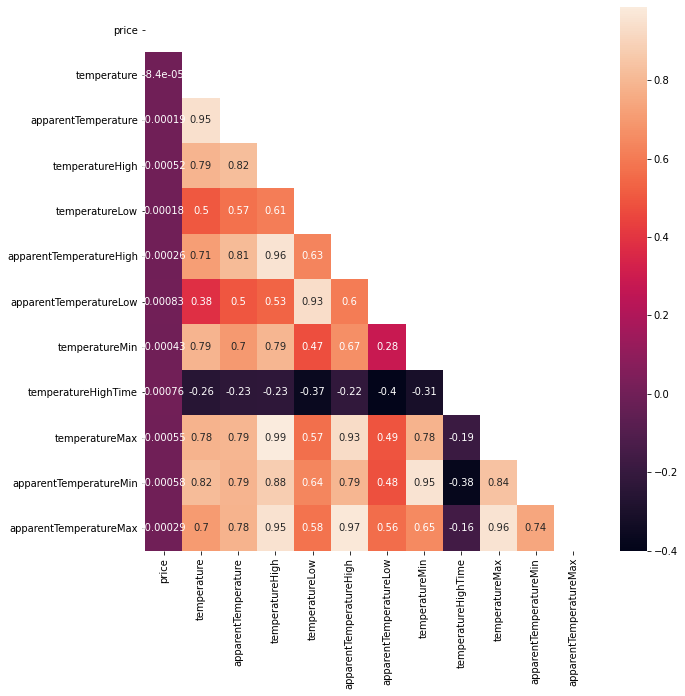

In [7]:
#plotting heatmap with correlation on data_new dataframe
plt.figure(figsize=(10,10))
sb.heatmap(data_new.corr(),annot=True, mask=np.triu(data_new.corr()))

Removing all the temperature related features from the dataframe as they have very weak correlation with the predictand(price)

In [8]:
data_new = data[['temperature','apparentTemperature','temperatureHigh','temperatureLow','apparentTemperatureHigh',
                'apparentTemperatureLow','temperatureMin','temperatureHighTime','temperatureMax','apparentTemperatureMin','apparentTemperatureMax']]

data = data.drop(data_new.columns,axis=1)
data.head()

,hour,day,month,timezone,source,destination,cab_type,product_id,name,price,...,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,moonPhase,precipIntensityMax
0,9,16,12,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,...,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,0.30,0.1276
1,2,27,11,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,...,rain,41.83,1003.97,90,1.00,0,4.786,291.1,0.64,0.1300
2,1,28,11,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,...,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,0.68,0.1064
3,4,30,11,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,...,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,0.75,0.0000
4,3,29,11,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,...,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,0.72,0.0001


Analyzing data in the categorical features

In [9]:
cat_col = data.select_dtypes(include=['object','category']).columns.tolist()
data_new = data[cat_col]
data_new.head()

,timezone,source,destination,cab_type,product_id,name,short_summary,icon
0,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,Mostly Cloudy,partly-cloudy-night
1,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,Rain,rain
2,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,Clear,clear-night
3,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,Clear,clear-night
4,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,Partly Cloudy,partly-cloudy-night


Checking for unique values in all categorical columns

In [10]:
for col in data_new:
    print(f'{col} : {data_new[col].unique()}')
    print()
    

timezone : ['America/New_York']

source : ['Haymarket Square' 'Back Bay' 'North End' 'North Station' 'Beacon Hill'
 'Boston University' 'Fenway' 'South Station' 'Theatre District'
 'West End' 'Financial District' 'Northeastern University']

destination : ['North Station' 'Northeastern University' 'West End' 'Haymarket Square'
 'South Station' 'Fenway' 'Theatre District' 'Beacon Hill' 'Back Bay'
 'North End' 'Financial District' 'Boston University']

cab_type : ['Lyft' 'Uber']

product_id : ['lyft_line' 'lyft_premier' 'lyft' 'lyft_luxsuv' 'lyft_plus' 'lyft_lux'
 '6f72dfc5-27f1-42e8-84db-ccc7a75f6969'
 '6c84fd89-3f11-4782-9b50-97c468b19529'
 '55c66225-fbe7-4fd5-9072-eab1ece5e23e'
 '9a0e7b09-b92b-4c41-9779-2ad22b4d779d'
 '6d318bcc-22a3-4af6-bddd-b409bfce1546'
 '997acbb5-e102-41e1-b155-9df7de0a73f2'
 '8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a']

name : ['Shared' 'Lux' 'Lyft' 'Lux Black XL' 'Lyft XL' 'Lux Black' 'UberXL'
 'Black' 'UberX' 'WAV' 'Black SUV' 'UberPool' 'Taxi']

short_summary : [' M

In [11]:
data_new['product_id'].value_counts()

6f72dfc5-27f1-42e8-84db-ccc7a75f6969    55096
6d318bcc-22a3-4af6-bddd-b409bfce1546    55096
9a0e7b09-b92b-4c41-9779-2ad22b4d779d    55096
6c84fd89-3f11-4782-9b50-97c468b19529    55095
8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a    55095
55c66225-fbe7-4fd5-9072-eab1ece5e23e    55094
997acbb5-e102-41e1-b155-9df7de0a73f2    55091
lyft_plus                               51235
lyft                                    51235
lyft_premier                            51235
lyft_lux                                51235
lyft_luxsuv                             51235
lyft_line                               51233
Name: product_id, dtype: int64

Removing timezone column as it has only value across all the observations and productid as it has more than 50% of the values with junk data

In [12]:
data = data.drop(['product_id','timezone'],axis=1)
data.head()

,hour,day,month,source,destination,cab_type,name,price,distance,surge_multiplier,...,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,moonPhase,precipIntensityMax
0,9,16,12,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0,...,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,0.30,0.1276
1,2,27,11,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0,...,rain,41.83,1003.97,90,1.00,0,4.786,291.1,0.64,0.1300
2,1,28,11,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0,...,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,0.68,0.1064
3,4,30,11,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0,...,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,0.75,0.0000
4,3,29,11,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0,...,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,0.72,0.0001


Analyzing features with numeric data types

In [13]:
num_col = data.select_dtypes(include=['int64','float64']).columns.tolist()
data_new = data[num_col]
data_new.columns

Index(['hour', 'day', 'month', 'price', 'distance', 'surge_multiplier',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'visibility', 'dewPoint', 'pressure', 'windBearing',
       'cloudCover', 'uvIndex', 'visibility.1', 'ozone', 'moonPhase',
       'precipIntensityMax'],
      dtype='object')

Analyzing climate related features with price column

In [14]:
cli_col = ['price','precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'visibility', 'dewPoint', 'pressure', 'windBearing',
       'cloudCover', 'uvIndex', 'visibility.1', 'ozone', 'moonPhase',
       'precipIntensityMax']
data_new = data[cli_col]
data_new.head()

,price,precipIntensity,precipProbability,humidity,windSpeed,windGust,visibility,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,moonPhase,precipIntensityMax
0,5.0,0.0000,0.0,0.68,8.66,9.17,10.000,32.70,1021.98,57,0.72,0,10.000,303.8,0.30,0.1276
1,11.0,0.1299,1.0,0.94,11.98,11.98,4.786,41.83,1003.97,90,1.00,0,4.786,291.1,0.64,0.1300
2,7.0,0.0000,0.0,0.75,7.33,7.33,10.000,31.10,992.28,240,0.03,0,10.000,315.7,0.68,0.1064
3,26.0,0.0000,0.0,0.73,5.28,5.28,10.000,26.64,1013.73,310,0.00,0,10.000,291.1,0.75,0.0000
4,9.0,0.0000,0.0,0.70,9.14,9.14,10.000,28.61,998.36,303,0.44,0,10.000,347.7,0.72,0.0001


<AxesSubplot:>

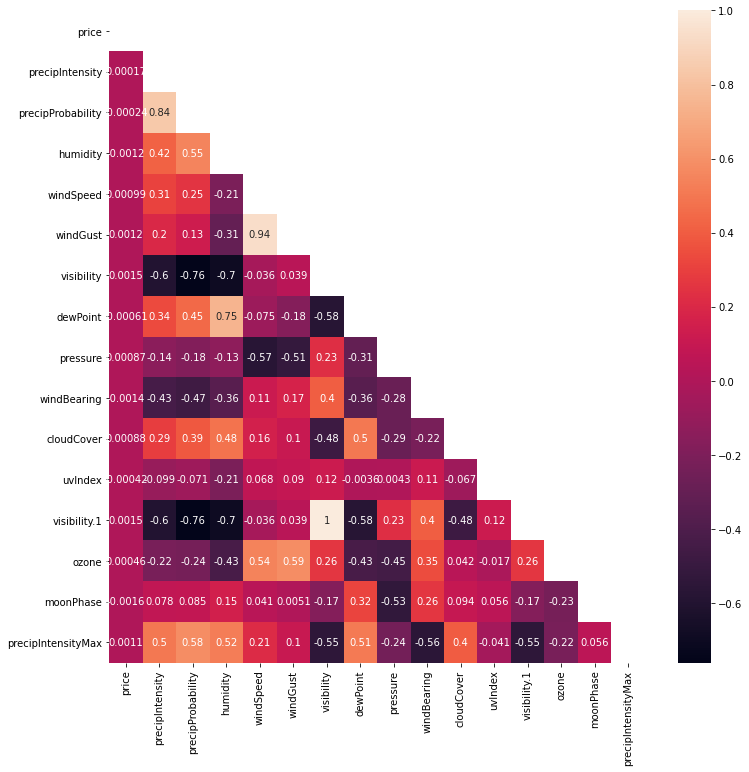

In [15]:
#plotting heatmap with correlation on data_new dataframe
plt.figure(figsize=(12,12))
sb.heatmap(data_new.corr(),annot=True, mask=np.triu(data_new.corr()))

All the climate related features has correlation almost 0 with respect to price column. Dropping these columns does'nt effect the accurracy prediction of price

In [16]:
cli_col = ['precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'visibility', 'dewPoint', 'pressure', 'windBearing',
       'cloudCover', 'uvIndex', 'visibility.1', 'ozone', 'moonPhase',
       'precipIntensityMax']
data = data.drop(cli_col,axis=1)
data.head()


,hour,day,month,source,destination,cab_type,name,price,distance,surge_multiplier,short_summary,icon
0,9,16,12,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0,Mostly Cloudy,partly-cloudy-night
1,2,27,11,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0,Rain,rain
2,1,28,11,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0,Clear,clear-night
3,4,30,11,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0,Clear,clear-night
4,3,29,11,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0,Partly Cloudy,partly-cloudy-night


In [17]:
data.shape

(693071, 12)

Encoding all the category columns with the Onehot Encoder

In [18]:
from sklearn.preprocessing import OneHotEncoder
cat_col = data.select_dtypes(include=['object','category']).columns.tolist()
print(cat_col)

#intiate OneHotEncoder and concatinating original df with encoded column df's
for col in cat_col:
    encoder = OneHotEncoder(handle_unknown='ignore')
    enc_df = pd.DataFrame(encoder.fit_transform(data[[col]]).toarray())
    enc_df.columns = encoder.get_feature_names([col])
    data = data.drop(col, axis=1)
    data = pd.concat([data, enc_df], axis=1)

['source', 'destination', 'cab_type', 'name', 'short_summary', 'icon']


In [19]:
data.columns

Index(['hour', 'day', 'month', 'price', 'distance', 'surge_multiplier',
       'source_Back Bay', 'source_Beacon Hill', 'source_Boston University',
       'source_Fenway', 'source_Financial District', 'source_Haymarket Square',
       'source_North End', 'source_North Station',
       'source_Northeastern University', 'source_South Station',
       'source_Theatre District', 'source_West End', 'destination_Back Bay',
       'destination_Beacon Hill', 'destination_Boston University',
       'destination_Fenway', 'destination_Financial District',
       'destination_Haymarket Square', 'destination_North End',
       'destination_North Station', 'destination_Northeastern University',
       'destination_South Station', 'destination_Theatre District',
       'destination_West End', 'cab_type_Lyft', 'cab_type_Uber', 'name_Black',
       'name_Black SUV', 'name_Lux', 'name_Lux Black', 'name_Lux Black XL',
       'name_Lyft', 'name_Lyft XL', 'name_Shared', 'name_Taxi',
       'name_UberPool',

In [20]:
data.head()

,hour,day,month,price,distance,surge_multiplier,source_Back Bay,source_Beacon Hill,source_Boston University,source_Fenway,...,short_summary_ Partly Cloudy,short_summary_ Possible Drizzle,short_summary_ Rain,icon_ clear-day,icon_ clear-night,icon_ cloudy,icon_ fog,icon_ partly-cloudy-day,icon_ partly-cloudy-night,icon_ rain
0,9,16,12,5.0,0.44,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,27,11,11.0,0.44,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,28,11,7.0,0.44,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,4,30,11,26.0,0.44,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,3,29,11,9.0,0.44,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Analyzing source column values with price

In [21]:
src_col = ['price','source_Back Bay', 'source_Beacon Hill', 'source_Boston University',
       'source_Fenway', 'source_Financial District', 'source_Haymarket Square',
       'source_North End', 'source_North Station',
       'source_Northeastern University', 'source_South Station',
       'source_Theatre District', 'source_West End', 'destination_Back Bay']
data_new = data[src_col]
data_new.head()

,price,source_Back Bay,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,source_North Station,source_Northeastern University,source_South Station,source_Theatre District,source_West End,destination_Back Bay
0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,11.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,26.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:>

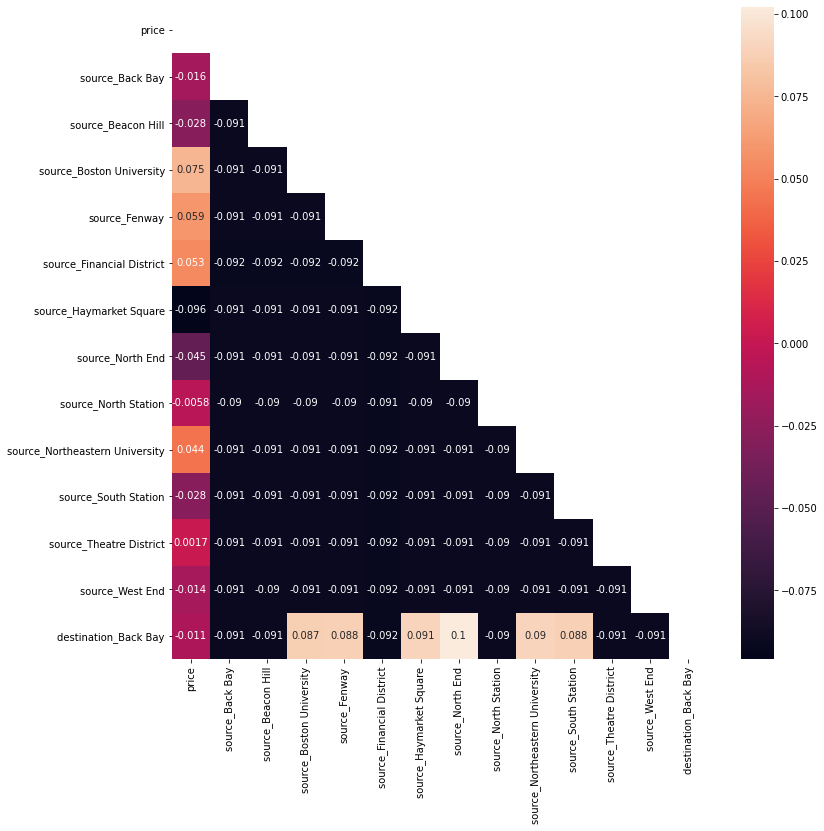

In [22]:
#plotting heatmap with correlation on data_new dataframe
plt.figure(figsize=(12,12))
sb.heatmap(data_new.corr(),annot=True, mask=np.triu(data_new.corr()))

Even source does'nt have any significant impact on the price. Similarly checking the same for destination column

In [23]:
dst_col = ['price','destination_Back Bay',
       'destination_Beacon Hill', 'destination_Boston University',
       'destination_Fenway', 'destination_Financial District',
       'destination_Haymarket Square', 'destination_North End',
       'destination_North Station', 'destination_Northeastern University',
       'destination_South Station', 'destination_Theatre District',
       'destination_West End']
data_new = data[src_col]
data_new.head()

,price,source_Back Bay,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,source_North Station,source_Northeastern University,source_South Station,source_Theatre District,source_West End,destination_Back Bay
0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,11.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,26.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:>

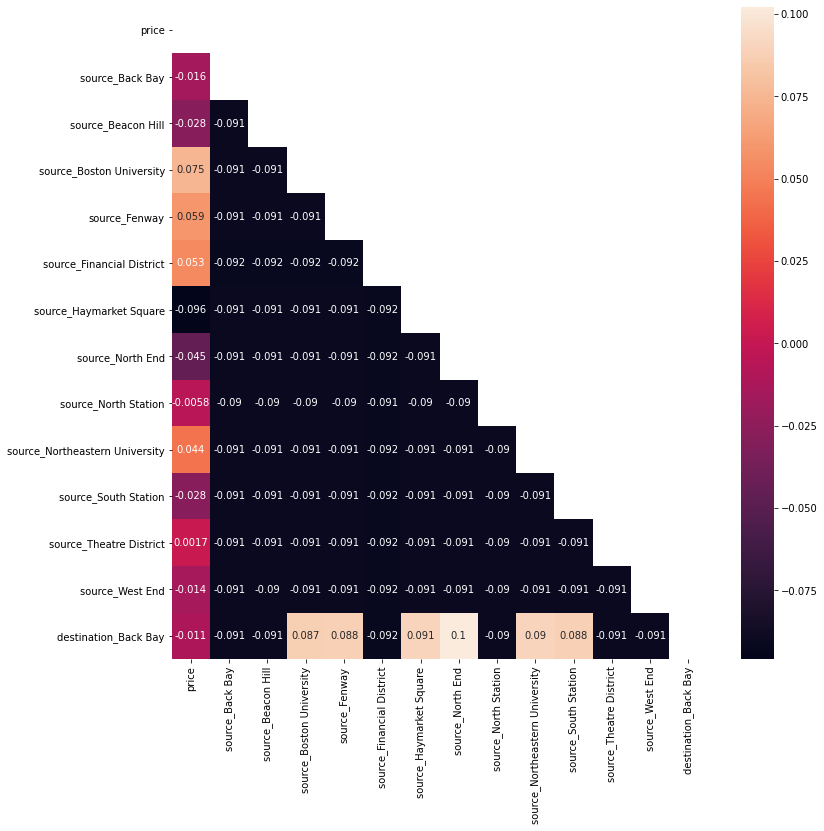

In [24]:
#plotting heatmap with correlation on data_new dataframe
plt.figure(figsize=(12,12))
sb.heatmap(data_new.corr(),annot=True, mask=np.triu(data_new.corr()))

From the above heatmaps, correlation values of source and destination are very low(almost 0). So removing them and restructing the data frame

In [25]:
cols = ['source_Back Bay', 'source_Beacon Hill', 'source_Boston University',
       'source_Fenway', 'source_Financial District', 'source_Haymarket Square',
       'source_North End', 'source_North Station',
       'source_Northeastern University', 'source_South Station',
       'source_Theatre District', 'source_West End', 'destination_Back Bay','destination_Back Bay',
       'destination_Beacon Hill', 'destination_Boston University',
       'destination_Fenway', 'destination_Financial District',
       'destination_Haymarket Square', 'destination_North End',
       'destination_North Station', 'destination_Northeastern University',
       'destination_South Station', 'destination_Theatre District',
       'destination_West End']
data = data.drop(cols,axis=1)
print(data.shape)
data.head()


(693071, 37)


,hour,day,month,price,distance,surge_multiplier,cab_type_Lyft,cab_type_Uber,name_Black,name_Black SUV,...,short_summary_ Partly Cloudy,short_summary_ Possible Drizzle,short_summary_ Rain,icon_ clear-day,icon_ clear-night,icon_ cloudy,icon_ fog,icon_ partly-cloudy-day,icon_ partly-cloudy-night,icon_ rain
0,9,16,12,5.0,0.44,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,27,11,11.0,0.44,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,28,11,7.0,0.44,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,4,30,11,26.0,0.44,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,3,29,11,9.0,0.44,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [26]:
data.columns

Index(['hour', 'day', 'month', 'price', 'distance', 'surge_multiplier',
       'cab_type_Lyft', 'cab_type_Uber', 'name_Black', 'name_Black SUV',
       'name_Lux', 'name_Lux Black', 'name_Lux Black XL', 'name_Lyft',
       'name_Lyft XL', 'name_Shared', 'name_Taxi', 'name_UberPool',
       'name_UberX', 'name_UberXL', 'name_WAV', 'short_summary_ Clear ',
       'short_summary_ Drizzle ', 'short_summary_ Foggy ',
       'short_summary_ Light Rain ', 'short_summary_ Mostly Cloudy ',
       'short_summary_ Overcast ', 'short_summary_ Partly Cloudy ',
       'short_summary_ Possible Drizzle ', 'short_summary_ Rain ',
       'icon_ clear-day ', 'icon_ clear-night ', 'icon_ cloudy ', 'icon_ fog ',
       'icon_ partly-cloudy-day ', 'icon_ partly-cloudy-night ',
       'icon_ rain '],
      dtype='object')

Checking correlation of summary column with price

In [27]:
summ_cols = ['price','short_summary_ Drizzle ', 'short_summary_ Foggy ',
       'short_summary_ Light Rain ', 'short_summary_ Mostly Cloudy ',
       'short_summary_ Overcast ', 'short_summary_ Partly Cloudy ',
       'short_summary_ Possible Drizzle ', 'short_summary_ Rain ','short_summary_ Clear ']
data_new = data[summ_cols]
data_new.head()

,price,short_summary_ Drizzle,short_summary_ Foggy,short_summary_ Light Rain,short_summary_ Mostly Cloudy,short_summary_ Overcast,short_summary_ Partly Cloudy,short_summary_ Possible Drizzle,short_summary_ Rain,short_summary_ Clear
0,5.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,9.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


<AxesSubplot:>

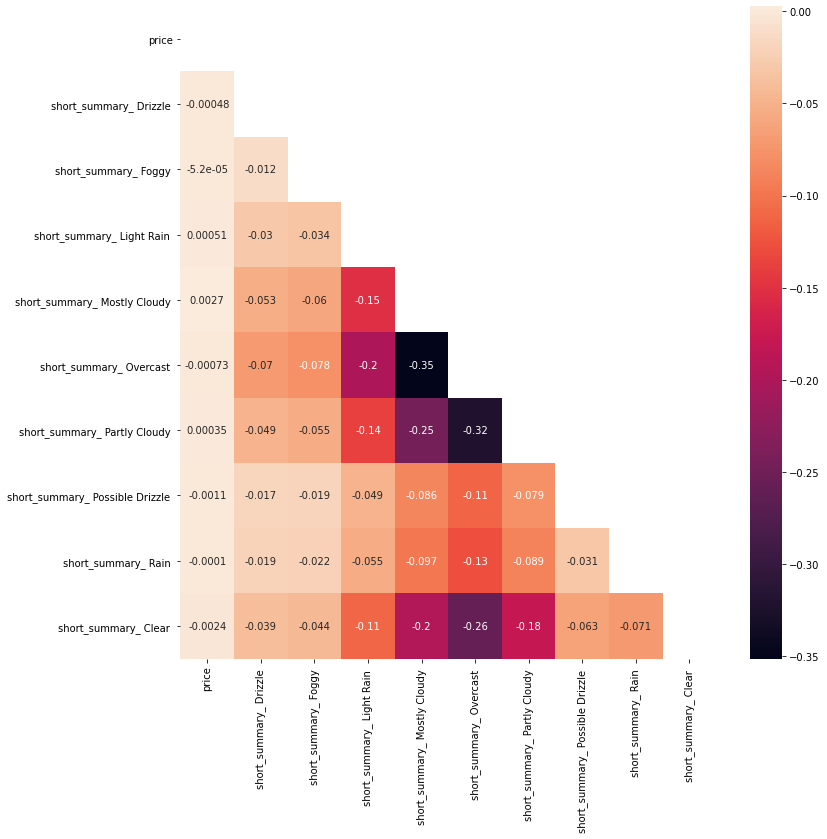

In [28]:
#plotting heatmap with correlation on data_new dataframe
plt.figure(figsize=(12,12))
sb.heatmap(data_new.corr(),annot=True, mask=np.triu(data_new.corr()))

Summary has no impact onn Price, so removing them from data frame

In [29]:
summ_cols = ['short_summary_ Drizzle ', 'short_summary_ Foggy ',
       'short_summary_ Light Rain ', 'short_summary_ Mostly Cloudy ',
       'short_summary_ Overcast ', 'short_summary_ Partly Cloudy ',
       'short_summary_ Possible Drizzle ', 'short_summary_ Rain ','short_summary_ Clear ']
data = data.drop(summ_cols,axis=1)
print(data.shape)
data.head()

(693071, 28)


,hour,day,month,price,distance,surge_multiplier,cab_type_Lyft,cab_type_Uber,name_Black,name_Black SUV,...,name_UberX,name_UberXL,name_WAV,icon_ clear-day,icon_ clear-night,icon_ cloudy,icon_ fog,icon_ partly-cloudy-day,icon_ partly-cloudy-night,icon_ rain
0,9,16,12,5.0,0.44,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,27,11,11.0,0.44,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,28,11,7.0,0.44,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,4,30,11,26.0,0.44,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,3,29,11,9.0,0.44,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Analyzing ICON Columns

In [30]:
ico_cols = ['price','icon_ clear-day ', 'icon_ clear-night ', 'icon_ cloudy ', 'icon_ fog ',
       'icon_ partly-cloudy-day ', 'icon_ partly-cloudy-night ',
       'icon_ rain ']
data_new = data[ico_cols]
data_new.head()

,price,icon_ clear-day,icon_ clear-night,icon_ cloudy,icon_ fog,icon_ partly-cloudy-day,icon_ partly-cloudy-night,icon_ rain
0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,11.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,26.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,9.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


<AxesSubplot:>

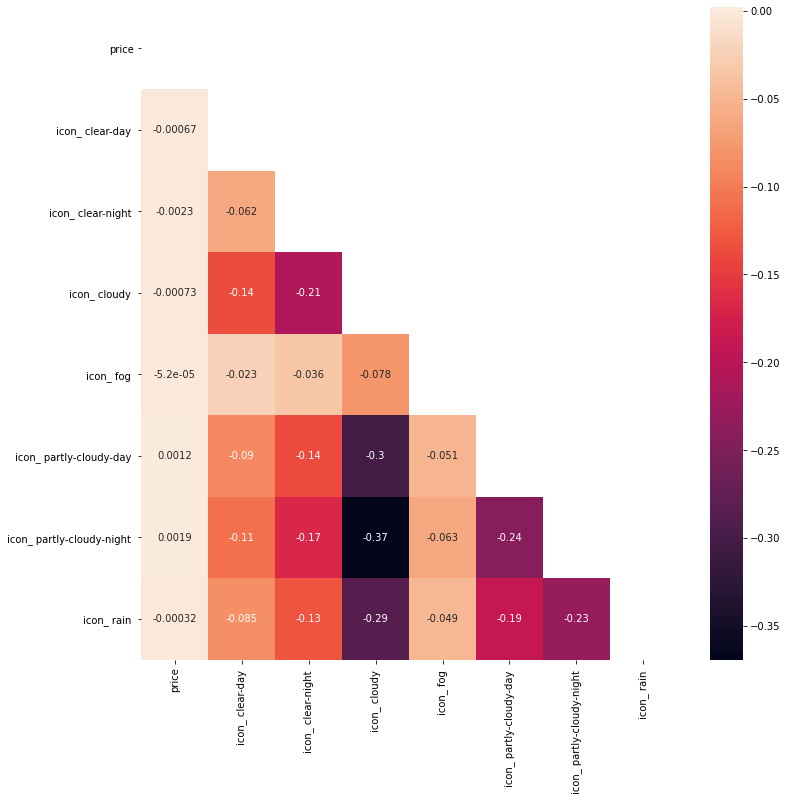

In [31]:
#plotting heatmap with correlation on data_new dataframe
plt.figure(figsize=(12,12))
sb.heatmap(data_new.corr(),annot=True, mask=np.triu(data_new.corr()))

Deleting all ICON related cols as it does not have any effect with Price

In [32]:
nme_cols = ['price','name_Black', 'name_Black SUV',
       'name_Lux', 'name_Lux Black', 'name_Lux Black XL', 'name_Lyft',
       'name_Lyft XL', 'name_Shared', 'name_Taxi', 'name_UberPool',
       'name_UberX', 'name_UberXL', 'name_WAV']
data_new = data[nme_cols]
data_new.head()

,price,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_Taxi,name_UberPool,name_UberX,name_UberXL,name_WAV
0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,11.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,26.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
ico_cols = ['icon_ clear-day ', 'icon_ clear-night ', 'icon_ cloudy ', 'icon_ fog ',
       'icon_ partly-cloudy-day ', 'icon_ partly-cloudy-night ',
       'icon_ rain ']
data = data.drop(ico_cols,axis=1)
print(data.shape)
data.head()

(693071, 21)


,hour,day,month,price,distance,surge_multiplier,cab_type_Lyft,cab_type_Uber,name_Black,name_Black SUV,...,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_Taxi,name_UberPool,name_UberX,name_UberXL,name_WAV
0,9,16,12,5.0,0.44,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2,27,11,11.0,0.44,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,28,11,7.0,0.44,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,30,11,26.0,0.44,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3,29,11,9.0,0.44,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


Analyzing name cols with price

In [34]:
nme_cols = ['price','name_Black', 'name_Black SUV',
       'name_Lux', 'name_Lux Black', 'name_Lux Black XL', 'name_Lyft',
       'name_Lyft XL', 'name_Shared', 'name_Taxi', 'name_UberPool',
       'name_UberX', 'name_UberXL', 'name_WAV']
data_new = data[nme_cols]
data_new.head()

,price,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_Taxi,name_UberPool,name_UberX,name_UberXL,name_WAV
0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,11.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,26.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:>

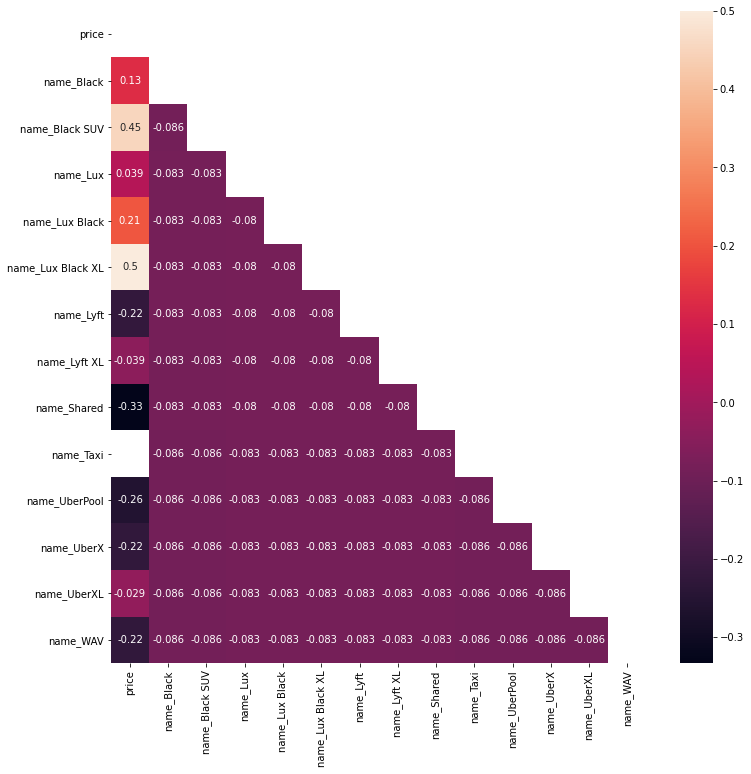

In [35]:
#plotting heatmap with correlation on data_new dataframe
plt.figure(figsize=(12,12))
sb.heatmap(data_new.corr(),annot=True, mask=np.triu(data_new.corr()))

Some values of names do have effect on Price value.

Analyzing remaining columns with Price

In [36]:
rem_cols =['price','hour', 'day', 'month', 'distance', 'surge_multiplier','cab_type_Lyft','cab_type_Uber']
data_new = data[rem_cols]
data_new.head()

,price,hour,day,month,distance,surge_multiplier,cab_type_Lyft,cab_type_Uber
0,5.0,9,16,12,0.44,1.0,1.0,0.0
1,11.0,2,27,11,0.44,1.0,1.0,0.0
2,7.0,1,28,11,0.44,1.0,1.0,0.0
3,26.0,4,30,11,0.44,1.0,1.0,0.0
4,9.0,3,29,11,0.44,1.0,1.0,0.0


<AxesSubplot:>

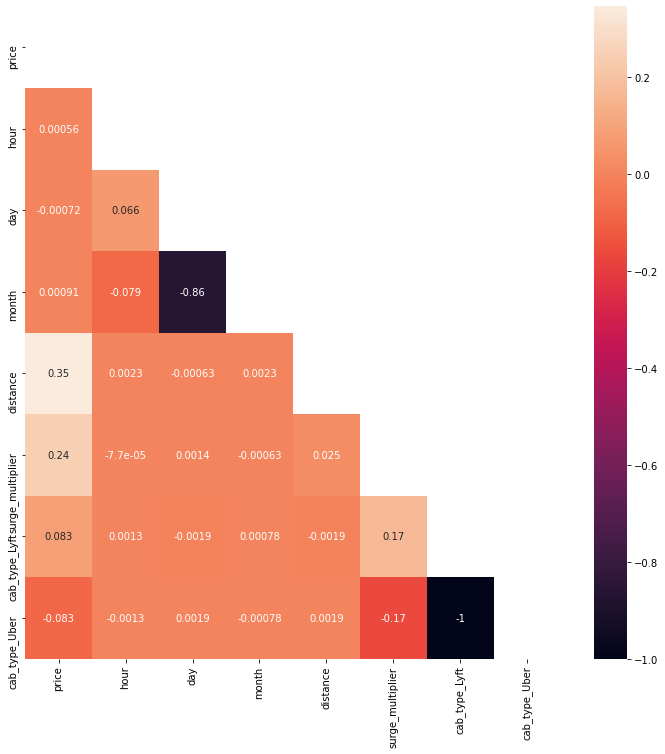

In [37]:
#plotting heatmap with correlation on data_new dataframe
plt.figure(figsize=(12,12))
sb.heatmap(data_new.corr(),annot=True, mask=np.triu(data_new.corr()))

From above heatmap, month day, hour,cabtype_Uber & cab_type_Lyft are weakly correlated, but distance and surge_multiplier has good correlation with Price
. So dropping month,day & hour.

In [38]:
data = data.drop(['month','day','hour','cab_type_Lyft','cab_type_Uber'],axis=1)
print(data.shape)
data.head()

(693071, 16)


,price,distance,surge_multiplier,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_Taxi,name_UberPool,name_UberX,name_UberXL,name_WAV
0,5.0,0.44,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,11.0,0.44,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7.0,0.44,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,26.0,0.44,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9.0,0.44,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


Checking for the null values in all featues

In [39]:
data.isnull().sum()

price                55095
distance                 0
surge_multiplier         0
name_Black               0
name_Black SUV           0
name_Lux                 0
name_Lux Black           0
name_Lux Black XL        0
name_Lyft                0
name_Lyft XL             0
name_Shared              0
name_Taxi                0
name_UberPool            0
name_UberX               0
name_UberXL              0
name_WAV                 0
dtype: int64

Price column has 55095 empty values, Not going imputing them as imputing predictand values results is getting more error values and less accuracy. So removing all the observations where price is empty

In [40]:
data = data.dropna(subset = ['price']).reset_index()

In [41]:
data.isnull().sum()

index                0
price                0
distance             0
surge_multiplier     0
name_Black           0
name_Black SUV       0
name_Lux             0
name_Lux Black       0
name_Lux Black XL    0
name_Lyft            0
name_Lyft XL         0
name_Shared          0
name_Taxi            0
name_UberPool        0
name_UberX           0
name_UberXL          0
name_WAV             0
dtype: int64

In [42]:
data.shape

(637976, 17)

Checking for outliers. Checking Min and Max threshold values and Plotting box plot on Price column..

In [43]:
max_threshold = data['price'].quantile(0.99)
max_threshold

42.5

In [44]:
data[data['price']>max_threshold]

,index,price,distance,surge_multiplier,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_Taxi,name_UberPool,name_UberX,name_UberXL,name_WAV
645,706,52.5,3.25,2.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
646,707,67.5,3.25,2.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
706,769,45.5,4.76,1.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1005,1094,45.5,4.31,1.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1210,1318,45.5,5.33,1.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637394,692439,47.0,5.56,1.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
637637,692698,52.5,4.58,1.25,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
637813,692891,47.5,5.42,1.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
637878,692962,51.0,7.36,1.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
min_threshold = data['price'].quantile(0.01)
min_threshold

3.5

In [46]:
data[data['price']<min_threshold]

,index,price,distance,surge_multiplier,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_Taxi,name_UberPool,name_UberX,name_UberXL,name_WAV
8,8,3.0,1.08,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
50,53,3.0,0.71,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
159,174,3.0,1.40,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
312,336,3.0,1.02,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
361,390,3.0,0.64,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637611,692670,3.0,1.69,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
637660,692723,3.0,3.08,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
637705,692772,3.0,0.70,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
637779,692854,3.0,3.13,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='price'>

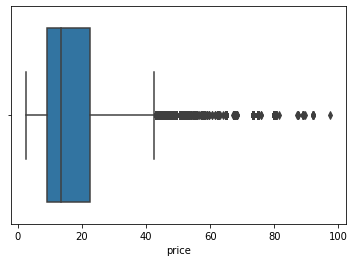

In [47]:
sb.boxplot(data['price'])

Values above 43 are the outliers of our dataset. Checking the indexes and count of those observtions:

In [48]:
out = np.where(data['price']>43)
print(out[0])
print(np.count_nonzero(np.where(data['price']>43)))

[   645    646    706 ... 637813 637878 637917]
5357


Removing all the 5357 rows in that array, as if these outliers are included, error value will increase

In [49]:
data.drop(out[0], inplace = True)
data.shape

(632619, 17)

Checking for skewness across all features

distance
0.7791878507534234


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


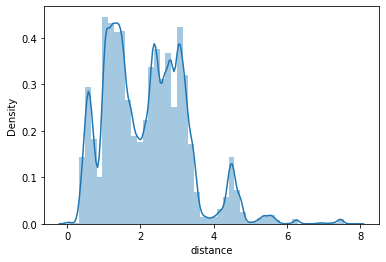

surge_multiplier
8.849268779215398


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


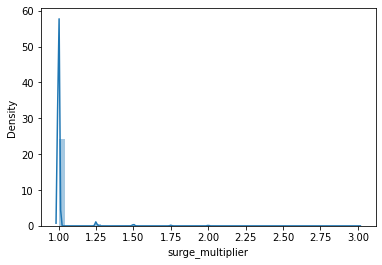

In [50]:
from scipy.stats import skew
cols = ['distance','surge_multiplier']
for col in cols:
    print(col)
    print(skew(data[col]))
    plt.figure()
    sb.distplot(data[col])
    plt.show()

Distance and Surge multiplier are very highly skewed with values 0.77 and 8.84 respectively. Cross checking the correlation values of these columns with predictant(price).

<AxesSubplot:>

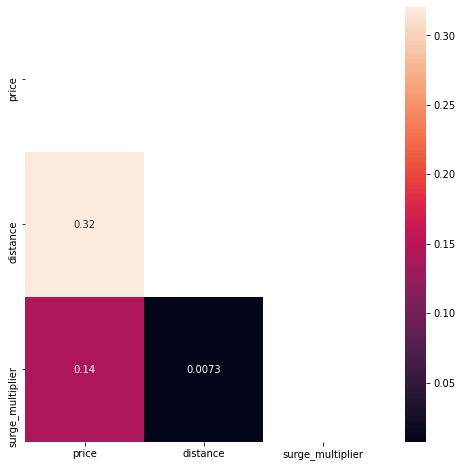

In [51]:
#plotting heatmap with correlation on data_new dataframe
cols = ['price','distance','surge_multiplier']
data_new = data[cols]

plt.figure(figsize=(8,8))
sb.heatmap(data_new.corr(),annot=True, mask=np.triu(data_new.corr()))

Surge multiplier has a very high skew value and less correlation with Price, whereas distance has decent correlation. So removing skewness from Surge multiplier alone using BoxCox transform

In [52]:
from scipy import stats

data['surge_multiplier'] = stats.boxcox(data['surge_multiplier'])[0]
pd.Series(data['surge_multiplier']).skew()

5.644449017653663

Skewness of Surge_multiplier reduced from 8.84 to 5.64

Splitting data for training and testing

In [53]:
from sklearn.model_selection import train_test_split
y = data['price'].values
X = data.drop(columns=['price'],axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

Performing linear regression on the trained data

In [54]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
model = lin_reg.fit(X_train,y_train)
y_pred=model.predict(X_test)

Checking R2 value for linear regression

In [55]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9300420917090527

Calucating the root mean sqaured error for linear regression

In [56]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred)
rootmeansq = np.sqrt(mse)
print(mse)
print(rootmeansq)

5.389008605040208
2.3214238314104145


Performing XG Boost regression on the trained data

Checking R2 value for xg boost regression

In [57]:
import xgboost as xg

xgb_r = xg.XGBRegressor(objective ='reg:linear',n_estimators = 10, seed = 123)
xgb_r.fit(X_train, y_train)
y_pred = xgb_r.predict(X_test)

[06:51:13] WARNING: ../src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


In [58]:
r2_score(y_test, y_pred)

0.9454679855042218

Calucating the root mean sqaured error for xg boost regression

In [59]:
mse = mean_squared_error(y_test,y_pred)
rootmeansq = np.sqrt(mse)
print(mse)
print(rootmeansq)

4.200718725690572
2.0495654968042794


**XG Boost regressor** gave the best accuracy of 0.9454 and minimum RMSE value of 1.9870